In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx
import numpy as np
import random

import tree_utils as tu
from wilsons import * #wilsons, loop_exists, pick_leaf, randomly_pick_root

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


192it [00:00, 2851.75it/s]


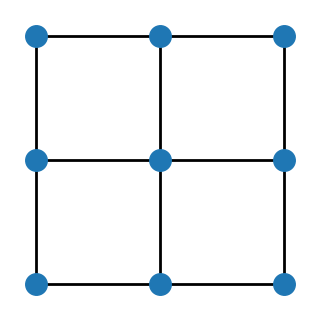

In [2]:
dims = (3, 3)
g = tu.generate_grid_graph(dims, queen=False)
all_trees = [tu.tup(tree) for tree in tu.enumerate_all_trees(g)]
num_trials = 100000
tu.draw(g)

In [ ]:
for i in range(1000):
    tree = wilsons(g)
    tu.test_valid_tree(tree, g)
    
data = []

for _ in tqdm(range(num_trials)):
    tree = wilsons(g)

    idx = all_trees.index(tu.tup(tree))
    data.append(idx)
    
tu.plot_sampled_STs(all_trees, data)

In [ ]:
# comparison with the spanning tree function already in tree_utils
# data = tu.sample_STs(all_trees, "UST", num_trials)
# tu.plot_sampled_STs(all_trees, data)

100%|███████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:23<00:00, 4206.65it/s]


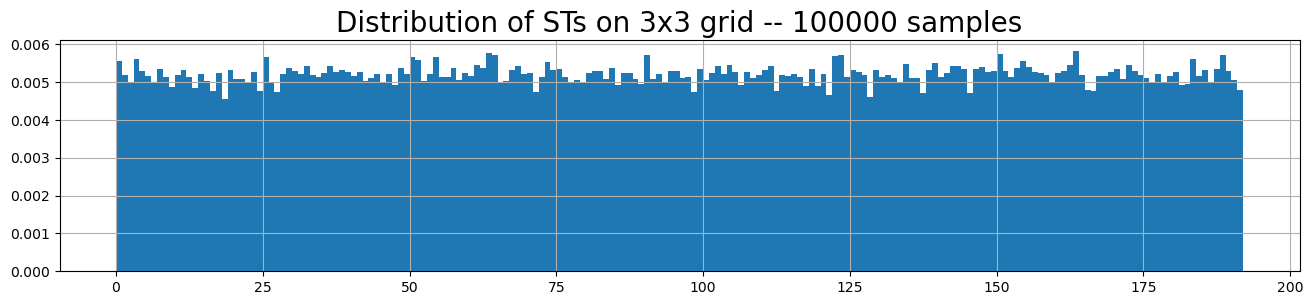

In [3]:
def add_frontier_to_tree(tree, frontier, stacks):
    """ Adds the nodes in the frontier that are pointing
        towards the tree. 
        
        Returns True if nodes were added to the tree, otherwise False.
    """
    new_edges = [] 

    for node in frontier:
        if stacks[node] in tree.nodes:
            new_edges.append((node, stacks[node]))
    
    for (u, v) in new_edges:
        tree.add_edge(u, v)
    
    return (len(new_edges) > 0)
            
def get_frontier(g, tree):
    """
    """
    frontier = set()
    for node in tree.nodes:
        for neighbor in g.neighbors(node):
            frontier.add(neighbor)
    frontier = frontier.difference(tree.nodes)
    return frontier


def rev_wilsons(g):
    root = randomly_pick_root(g)
    
    tree = nx.Graph()
    tree.add_node(root)
    stacks = initialize_stacks(g, root)

    
    while tree.number_of_nodes() < g.number_of_nodes():
        frontier = get_frontier(g, tree)
        if not add_frontier_to_tree(tree, frontier, stacks):
            src = pick_leaf(g, tree)
            lerw(src, g, tree, stacks)
            # clear_tree_from_stacks(tree, stacks)

    return tree

for i in range(1000):
    tree = rev_wilsons(g)
    tu.test_valid_tree(tree, g)
    
data = []

for _ in tqdm(range(num_trials)):
    tree = rev_wilsons(g)

    idx = all_trees.index(tu.tup(tree))
    data.append(idx)
    
tu.plot_sampled_STs(all_trees, data)